In [1]:
import scanpy as sc
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import rcParams

import squidpy as sq

import numpy as np

import cellcharter as cc

In [2]:
sc.set_figure_params(dpi_save=300)

pd.set_option('display.max_rows', 200)

#  Load data

In [3]:
# Load global object
adata = sc.read_h5ad("h5ad/scvi/xenium5k_scVI_CellCharter_clustImmune_postQC.h5ad")

## Flip xy coordinate system to match H&E slide orientation

In [4]:
# Reformatting of column
adata.obs.sample = adata.obs['sample']

In [5]:
# Invert y axis per sample to maintain consistent (0, max) range per sample 
for sample in adata.obs.sample.cat.categories:
    idx = adata.obs.sample == sample
    adata.obsm['spatial'][idx, 1] = np.max(adata.obsm['spatial'][idx, 1]) - adata.obsm['spatial'][idx, 1]  # invert y axis


In [6]:
adata.obsm['spatial'] = adata.obsm['spatial'][:, [1, 0]]  # flip x and y coordinates

In [7]:
#adata.obs.annot[adata.obs.annot == 'nan'] = pd.NA

#adata.obs.annot = adata.obs.annot.cat.remove_categories('nan')

In [8]:
#adata.obs.annot = adata.obs.annot.astype('str').astype('category')

In [9]:
#adata.obs.annot.value_counts()

In [10]:
# Load T cell annotation from lorenz
cell_annot = pd.read_csv("lorenz_annotation/250104_T_cell_reannotation.csv")
cell_annot.index = cell_annot.iloc[:,0]

# remove extra columns
cell_annot = cell_annot.drop(columns=['Unnamed: 0', 'cell_id', 'barcode'])

# rename columns
cell_annot = cell_annot.rename(columns={'annotation_broad': 'T_annotation_broad', 'annotation_fine': 'T_annotation_fine'})

In [11]:
cell_annot

,T_annotation_broad,T_annotation_fine
Unnamed: 0,,
0033516_adjacent_aaajlmcc-1,T_CD4,T_CD4
0033516_adjacent_aaapdnho-1,T_CD4,T_CD4
0033516_adjacent_aacidbbn-1,T_CD4,T_CD4
0033516_adjacent_aacifgeo-1,T_CD4,T_CD4
0033516_adjacent_aacingoh-1,T_CD4,T_CD4
...,...,...
0043587_affected_ohggldmo-1,T_CD4,T_CD4
0043587_affected_ohhhlfee-1,T_CD4,T_Reg
0043587_affected_ohhmnjkh-1,T_CD8,T_CD8_EM


In [12]:
# Add T cell annotation to main dataframe
adata.obs = adata.obs.join(cell_annot)

In [13]:
adata.obs

,cell_id,x_centroid,y_centroid,transcript_counts,control_probe_counts,genomic_control_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,cell_area,...,spatial_cluster18,leiden4,leiden8,leiden10,Immune_All_Low_predicted_labels,Immune_All_Low_over_clustering,Immune_All_Low_majority_voting,Immune_All_Low_conf_score,T_annotation_broad,T_annotation_fine
0033516_adjacent_aaaalbkb-1,aaaalbkb-1,494.587372,1497.218262,795,0,0,0,0,1,81.461878,...,6,15,14,17,Double-positive thymocytes,5,Tcm/Naive helper T cells,0.135839,NaN,NaN
0033516_adjacent_aaaambfn-1,aaaambfn-1,491.540802,1487.405151,675,0,0,0,0,0,83.539066,...,6,15,54,74,Epithelial cells,108,Tcm/Naive helper T cells,0.152549,NaN,NaN
0033516_adjacent_aaabjcij-1,aaabjcij-1,487.184479,1493.383057,781,0,0,0,0,1,66.966721,...,6,15,14,17,Epithelial cells,5,Tcm/Naive helper T cells,0.757599,NaN,NaN
0033516_adjacent_aaacbbae-1,aaacbbae-1,476.936798,1525.450439,383,1,0,0,0,1,33.009220,...,6,15,14,17,Tcm/Naive helper T cells,5,Tcm/Naive helper T cells,0.929760,NaN,NaN
0033516_adjacent_aaacnfcj-1,aaacnfcj-1,481.816986,1522.196533,261,0,0,0,0,0,42.627502,...,6,15,14,17,Tcm/Naive helper T cells,5,Tcm/Naive helper T cells,0.597979,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0043587_affected_oimglgpc-1,oimglgpc-1,4805.458496,2426.871582,120,0,0,0,0,0,117.225629,...,7,21,26,46,Tem/Trm cytotoxic T cells,98,Tcm/Naive helper T cells,0.127490,T_CD4,TH-17
0043587_affected_oimlffha-1,oimlffha-1,4531.083984,2675.309814,109,0,0,0,0,0,21.268595,...,7,23,9,2,Tcm/Naive helper T cells,109,Tcm/Naive helper T cells,0.043314,NaN,NaN
0043587_affected_oimlghpj-1,oimlghpj-1,4561.429199,2685.089355,104,0,0,0,0,0,131.269224,...,7,18,24,10,Tcm/Naive helper T cells,64,Tcm/Naive helper T cells,0.885915,NaN,NaN
0043587_affected_oimoklkm-1,oimoklkm-1,4617.350586,2831.366699,122,0,0,0,0,0,25.061720,...,7,19,7,45,Tcm/Naive helper T cells,105,Tcm/Naive helper T cells,0.070332,NaN,NaN


In [14]:
adata

AnnData object with n_obs × n_vars = 434516 × 5001
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'genomic_control_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'cell_area', 'nucleus_area', 'nucleus_count', 'segmentation_method', 'sample', 'graphclust', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'leiden', 'megagut_lvl3_predicted_labels', 'megagut_lvl3_over_clustering', 'megagut_lvl3_majority_voting', 'megagut_lvl3_conf_score', 'megagut_lvl1_predicted_labels', 'megagut_lvl1_over_clustering', 'megagut_lvl1_majority_voting', 'megagut_lvl1_conf_score', 'fibro_predicted_labels', 'fibro_over_clustering', 'fibro_majority_voting', 'fibro_conf_score', 'MF1_prob', 'MF2_prob', 'PC_prob', 'S1_prob', 'S2_prob', 'S3_prob', 'S3x_prob

In [15]:
adata.obs.T_annotation_fine.value_counts()

T_annotation_fine
T_CD4_EM         11246
T_CD4_CM         10727
Mixed             7217
T_CD4             5339
T_CD8_EM          5228
T_CD8_TE          5106
T_Reg             4298
T_FH              3462
T_CD4_Cycling     3238
TH-17             3041
T_G/D             1850
T_CD8_CM          1671
T_CD8_RM          1292
Name: count, dtype: int64

In [16]:
adata.obs.T_annotation_broad.value_counts()

T_annotation_broad
T_CD4    41351
T_CD8    13297
Mixed     7217
T_G/D     1850
Name: count, dtype: int64

In [17]:
# Remove mixed T cell cluster
adata.obs.T_annotation_fine[adata.obs.T_annotation_fine == 'Mixed'] = pd.NA

/tmp/ipykernel_8847/1722717811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs.T_annotation_fine[adata.obs.T_annotation_fine == 'Mixed'] = pd.NA


In [18]:
#adata.obs.T_annotation_fine.value_counts()

# Transfer T cell annotations 

## Subset of data with overlapping labels

In [19]:
adata.obs.T_annotation_fine = adata.obs.T_annotation_fine.astype('category')

In [20]:
adata_sub = adata[~(adata.obs.T_annotation_fine.isna())]

adata_sub = adata_sub[~adata_sub.obs.annot.isna()]

In [21]:
adata.obs.annot

0033516_adjacent_aaaalbkb-1                            TA
0033516_adjacent_aaaambfn-1                        Goblet
0033516_adjacent_aaabjcij-1                        Goblet
0033516_adjacent_aaacbbae-1                            TA
0033516_adjacent_aaacnfcj-1                            TA
                                          ...            
0043587_affected_oimglgpc-1                      Trm_Th17
0043587_affected_oimlffha-1    Glial/Enteric_neural_crest
0043587_affected_oimlghpj-1               Myofibroblast_1
0043587_affected_oimoklkm-1                    Macrophage
0043587_affected_oinegbko-1               Myofibroblast_1
Name: annot, Length: 434516, dtype: category
Categories (48, object): ['B_memory', 'B_plasma_IgA1', 'Branch_A_interneuron', 'DC_cDC1', ..., 'Trm/em_CD8', 'Trm_CD8', 'Trm_Th17', 'vSMC']

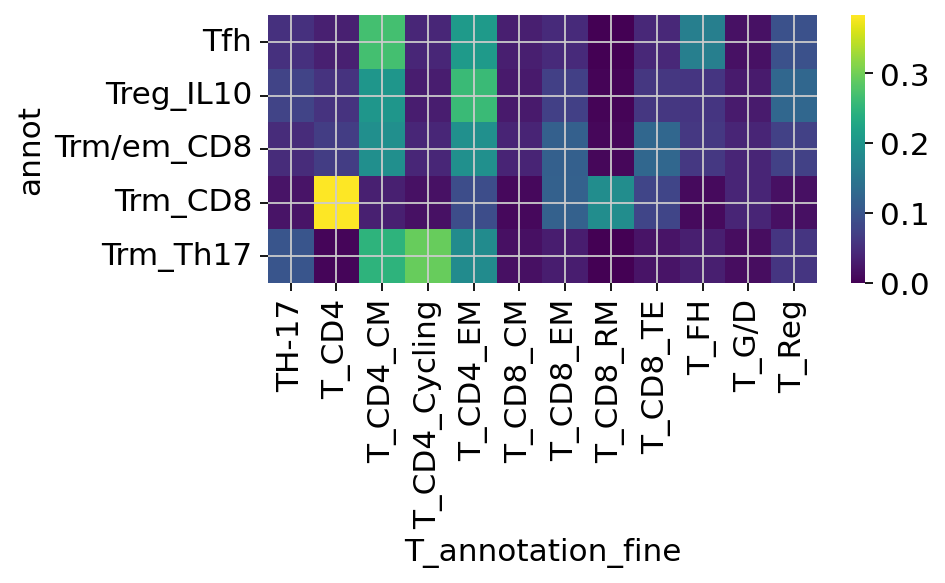

In [22]:
conf_mat = sc.metrics.confusion_matrix("annot", "T_annotation_fine", adata_sub.obs)
rcParams['figure.figsize'] = 5.5, 2.2
#sns.set_style("whitegrid", {'axes.grid' : False})
sns.heatmap(
    conf_mat,
    xticklabels=True,
    yticklabels=True,
    cmap='viridis'
)

plt.show()

## Transfer annotation

In [23]:
adata.obs.annot = adata.obs.annot.astype('str')

In [24]:
idx = ~adata.obs.T_annotation_fine.isna()

adata.obs.annot[idx] = adata.obs.T_annotation_fine[idx]

/tmp/ipykernel_8847/3895187825.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs.annot[idx] = adata.obs.T_annotation_fine[idx]


In [25]:
adata.obs.annot.value_counts()

annot
B_plasma_IgA1                 33778
B_memory                      32915
Enterocyte                    31300
SMC_PPLP2                     29046
nan                           27041
EC_venous                     25056
SMC_CAPN3                     18693
Macrophage                    14403
S3_crypt                      12104
T_CD4_EM                      11246
T_CD4_CM                      10727
Macrophage_LYVE1              10172
S3_oral_mucosa-like            9281
Glial/Enteric_neural_crest     8941
Goblet                         8867
S3_lamina propria              7471
S4                             7037
Pericyte_1                     6737
Monocyte                       6409
Pericyte_2                     6167
vSMC                           5636
S3x_1                          5522
T_CD4                          5339
EC_arterial_2                  5306
T_CD8_EM                       5228
T_CD8_TE                       5106
Myofibroblast_1                5006
TA                    

In [26]:
adata.obs.annot[adata.obs.annot == 'nan'] = pd.NA

#adata.obs.annot = adata.obs.annot.cat.remove_categories('nan')

/tmp/ipykernel_8847/2215073434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs.annot[adata.obs.annot == 'nan'] = pd.NA


In [27]:
adata.obs.annot.value_counts()

annot
B_plasma_IgA1                 33778
B_memory                      32915
Enterocyte                    31300
SMC_PPLP2                     29046
EC_venous                     25056
SMC_CAPN3                     18693
Macrophage                    14403
S3_crypt                      12104
T_CD4_EM                      11246
T_CD4_CM                      10727
Macrophage_LYVE1              10172
S3_oral_mucosa-like            9281
Glial/Enteric_neural_crest     8941
Goblet                         8867
S3_lamina propria              7471
S4                             7037
Pericyte_1                     6737
Monocyte                       6409
Pericyte_2                     6167
vSMC                           5636
S3x_1                          5522
T_CD4                          5339
EC_arterial_2                  5306
T_CD8_EM                       5228
T_CD8_TE                       5106
Myofibroblast_1                5006
TA                             4989
S1                    

In [28]:
# Exclude leftover CellTypist annotation of T cells
adata.obs[adata.obs.annot == 'Tfh'] = pd.NA
adata.obs[adata.obs.annot == 'Trm_Th17'] = pd.NA
adata.obs[adata.obs.annot == 'Treg_IL10'] = pd.NA
adata.obs[adata.obs.annot == 'Trm_CD8'] = pd.NA
adata.obs[adata.obs.annot == 'Trm/em_CD8'] = pd.NA

/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jovyan/my-conda-envs/img/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_m

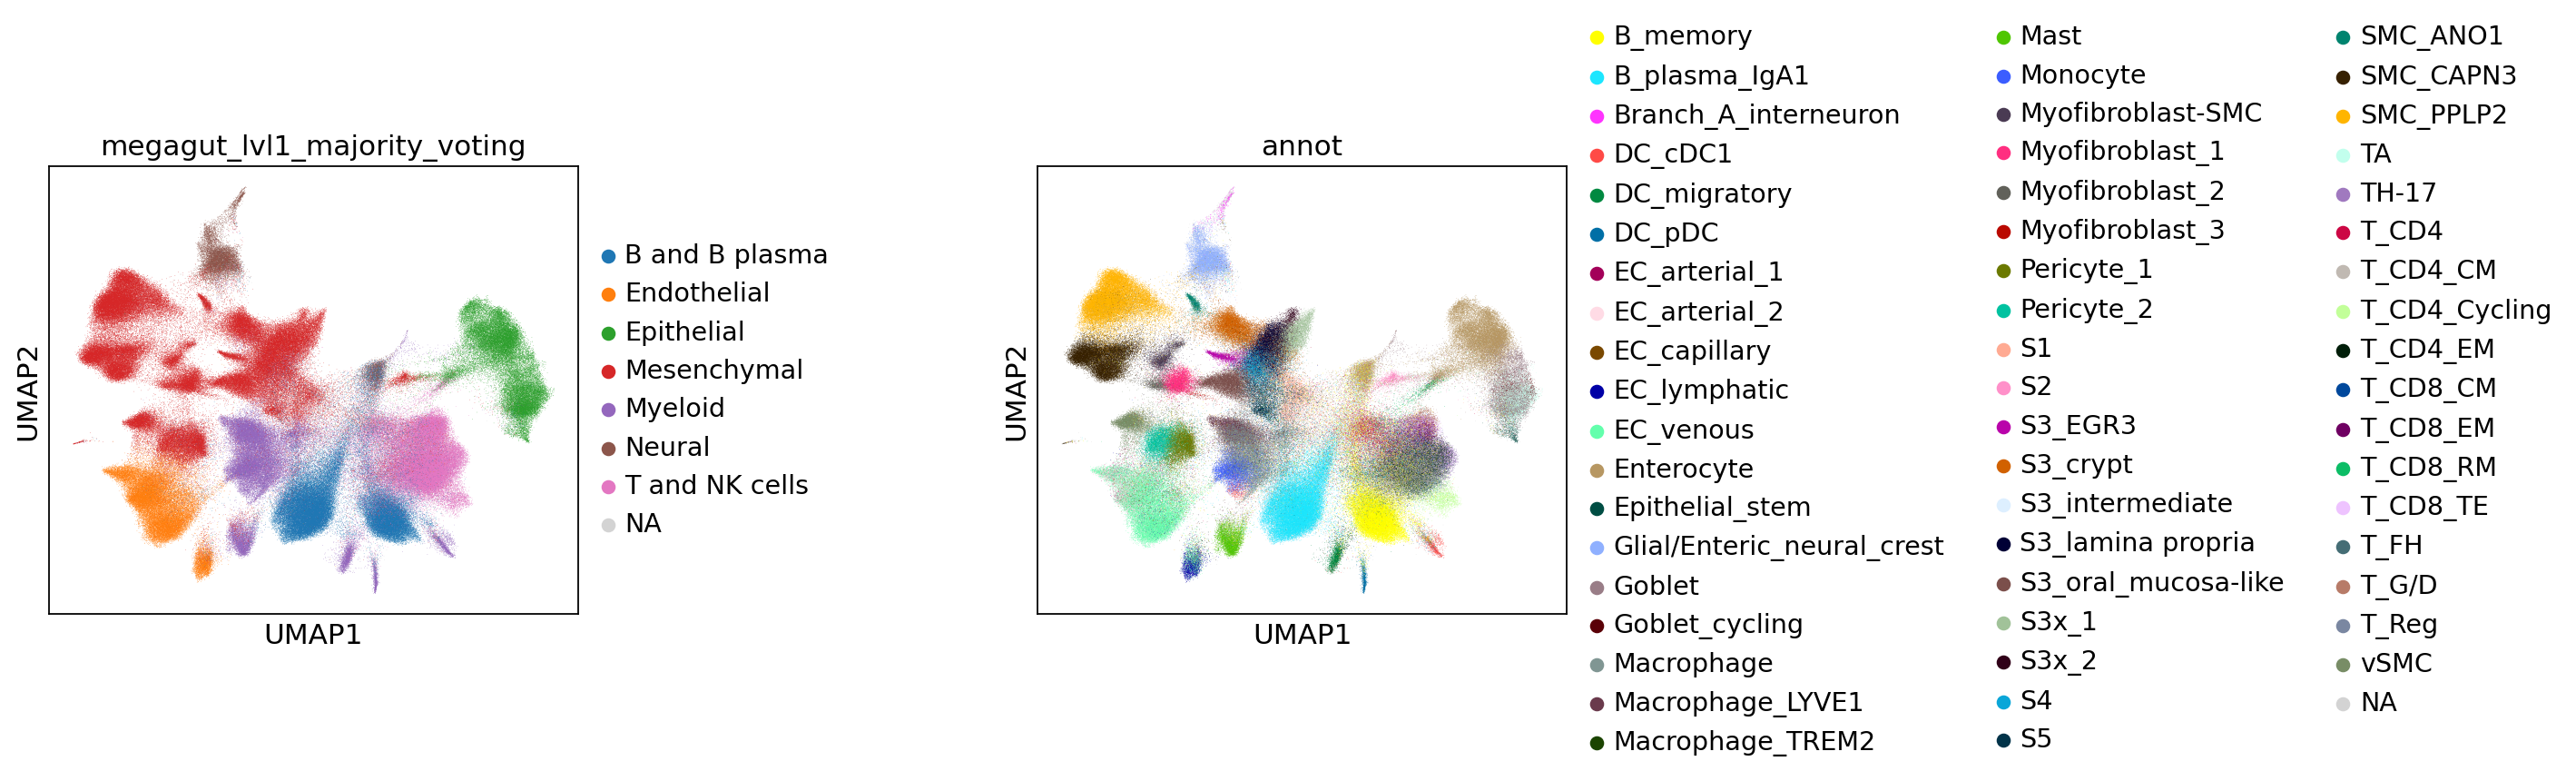

In [29]:
rcParams["figure.figsize"] = (4, 4)

sc.pl.umap(
    adata,
    color=[
        "megagut_lvl1_majority_voting", "annot"
    ],
    wspace=0.7,
    hspace=0.7,
    #palette=sc.pl.palettes.default_28
    #palette=sc.pl.palettes.default_102
    #palette=sc.pl.palettes.vega_20_scanpy
#    save="_xenium5k_celltypist_linage_confidence.pdf"
)

In [30]:
cc.gr.enrichment(adata, group_key='spatial_cluster18', label_key='annot')

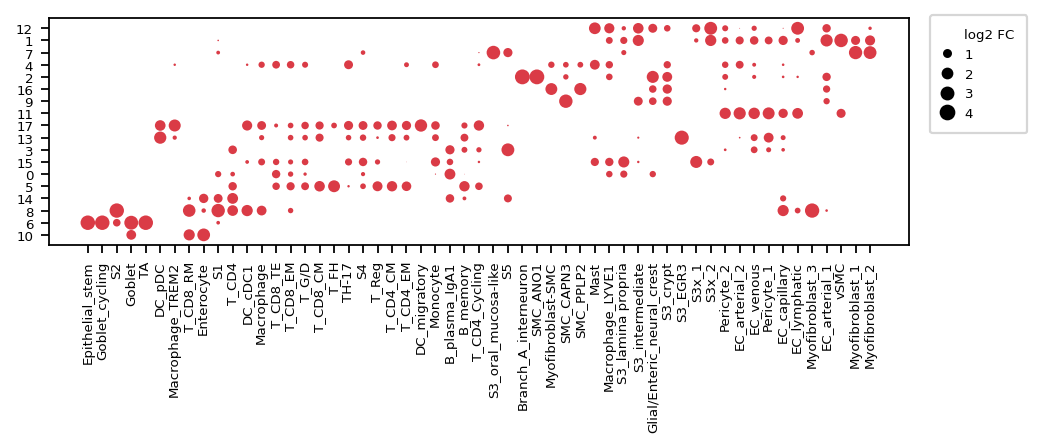

In [31]:
cc.pl.enrichment(
    adata,
    group_key='spatial_cluster18', label_key='annot',
    figsize=(6,3), fontsize=6, dot_scale=1,
    label_cluster=True,
    save="figures_niches/CellCharter_niches18_enrichment_dotplot_v5.pdf")

In [32]:
adata.write_h5ad("h5ad/scvi/xenium5k_scVI_CellCharter_clustImmune_postQC_Tannot.h5ad")